In [1]:
import sys
sys.path.append('/home/lessa/smodels')
from smodels.experiment.databaseObj import Database
from smodels.tools.physicsUnits import GeV,fb,pb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
db = Database('/home/lessa/smodels-database')

In [17]:
exp = db.getExpResults(analysisIDs=['CMS-SUS-13-002'],dataTypes=['upperLimit'],txnames=['T1tttt'],
                       useSuperseded=True,useNonValidated=True)[0]

In [18]:
tx = exp.getTxNames()[0]
data = tx.txnameData._data

In [19]:
#Get points from desired plane
xvals = [pt[0][0][0].asNumber(GeV) for pt in data]
yvals = [pt[0][0][-1].asNumber(GeV) for pt in data]
zvals = [pt[1].asNumber(fb) for pt in data]

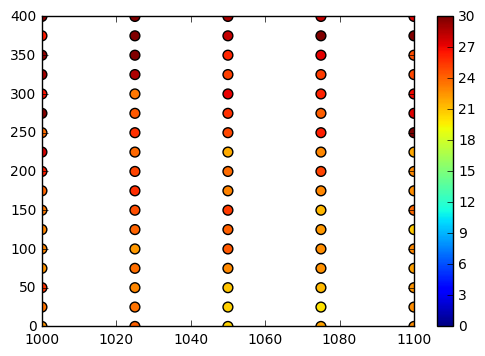

In [23]:
from math import log
lzvals = [log(z) for z in zvals]
fig = plt.figure()
plt.scatter(xvals, yvals, c=zvals, s=50)
plt.colorbar()
plt.clim(0.,30.)
plt.xlim(1000.,1100.)
plt.ylim(0.,400.)
plt.show()

In [40]:
print xvals[0:3]
print yvals[0:3]
print zvals[0:3]

[300.0, 400.0, 400.0]
[120.0, 120.0, 200.0]
[811.61, 3.3988, 34.792]


In [15]:
import random
npts = 300
inxvals = []
inyvals = []
inzvals = []
for i in range(npts):
    x = random.uniform(300.,400.)
    y =random.uniform(0.,150.)
    z = tx.txnameData.getValueFor([[x*GeV,y*GeV]]*2)
    if z is None or z <= 0.*pb: continue
    inxvals.append(x)
    inyvals.append(y)
    inzvals.append(z.asNumber(pb))
inLzvals = [log(z) for z in inzvals]

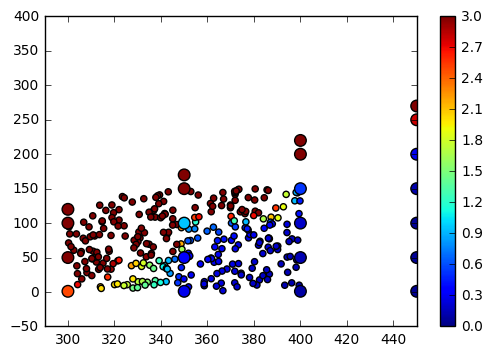

In [17]:
fig = plt.figure()
allx = inxvals + xvals
ally = inyvals + yvals
allz = inzvals + zvals
allsize = [20]*len(inxvals) + [70]*len(xvals)
plt.scatter(allx, ally, c=allz, s=allsize)
# plt.scatter(inxvals, inyvals, c=inLzvals)
# plt.scatter(xvals, yvals, c=lzvals,s=50)
plt.colorbar()
plt.clim(0.,3.)
plt.xlim(290.,450.)
plt.show()

In [32]:
print inxvals[:10]

[234.07627089062356, 229.3384476500018, 233.31313058816187, 212.3374652926374, 237.46899711806796, 283.78798500274263, 235.07919978633504, 263.2739897643288, 240.97291127100576, 193.08071443957888]


In [33]:
print inxvals[3],inyvals[3],inzvals[3]

212.337465293 5.59612346015 12.7071008641


In [35]:
for i,x in enumerate(xvals):
    if abs(x-200.) < 5. and abs(yvals[i]-20.) < 10.:
        print i

28


In [36]:
print xvals[28],yvals[28],zvals[28]

200.0 25.0 23.0


In [37]:
log(23.)

3.1354942159291497

In [38]:
log(12.7)

2.5416019934645457

In [62]:
m = [[200.*GeV, 1.50E+02*GeV, 55.*GeV]]*2
tx.txnameData.getValueFor(m)

2.09E+01 [pb]

In [72]:
pts = np.array([[x,tx.txnameData.getValueFor([[300.*GeV, 1.49E+02*GeV, x*GeV]]*2).asNumber(pb)] for x in np.arange(50.,100.,1.)])

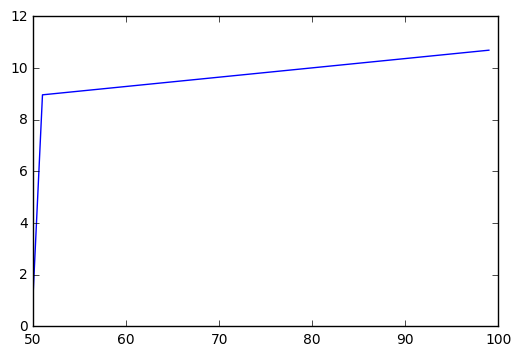

In [73]:
plt.plot(pts[:,0],pts[:,1])
plt.show()